# Unit 4: Smarter Models – Trees and Forests + Overfitting and Underfitting

---

## Lesson 4.2: What is a Decision Tree?

### Real-life example:
Imagine you’re picking a fruit:

- Is it red?
  - Yes → Is it small?
    - Yes → Cherry 
    - No → Apple
- Is it yellow?
  - Yes → Banana

A decision tree works just like that, asking multiple questions to reach an answer.

---

### Why Use Decision Trees?

- Easy to understand  
- Can handle both numbers and categories  
- Can handle missing values pretty well

---

## Code Example: Comparing Decision Tree to Logistic Regression

We’ll use a made-up dataset where the boundary is NOT a straight line.

In [35]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Making a fake dataset (non-linear)
X, y = make_moons(n_samples=200, noise=0.25, random_state=42)

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_preds = logreg.predict(X_test)

# Decision Tree
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)
tree_preds = tree.predict(X_test)

# Compare accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_preds))
print("Decision Tree Accuracy:", accuracy_score(y_test, tree_preds))

Logistic Regression Accuracy: 0.84
Decision Tree Accuracy: 0.92


The Decision Tree performed much better than the Logistic Regression model

### Visualization

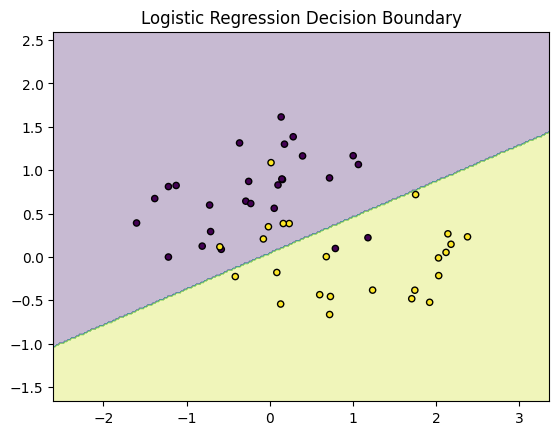

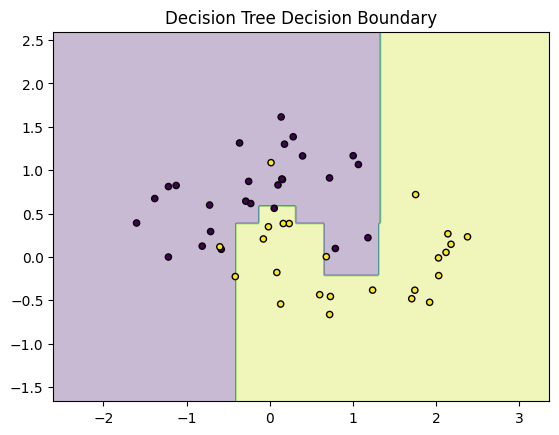

In [36]:
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", s=20)
    plt.title(title)
    plt.show()

plot_decision_boundary(logreg, X_test, y_test, "Logistic Regression Decision Boundary")

plot_decision_boundary(tree, X_test, y_test, "Decision Tree Decision Boundary")

### What We See

- Logistic Regression draws a straight line. It struggles on wavy or curved patterns

- Decision Tree makes jagged cuts that follow the shape of the data

- Decision Trees usually do better when the data is complex or non-linear